## Libraries

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

## Loading Dataset

In [3]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

This dataset contains very less rows but the procedure will be the same doesn't matter if this dataset would have contained 20,000 rows of data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


From the above, we can see that the dataset contains 2 columns with float values 4 with categorical values and the rest contains integer values.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## Exploratory Data Analysis
EDA is an approach to analyzing the data using techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

So, there are no null values in the fiven dataset. Hence we are good to go for the data analysis part.

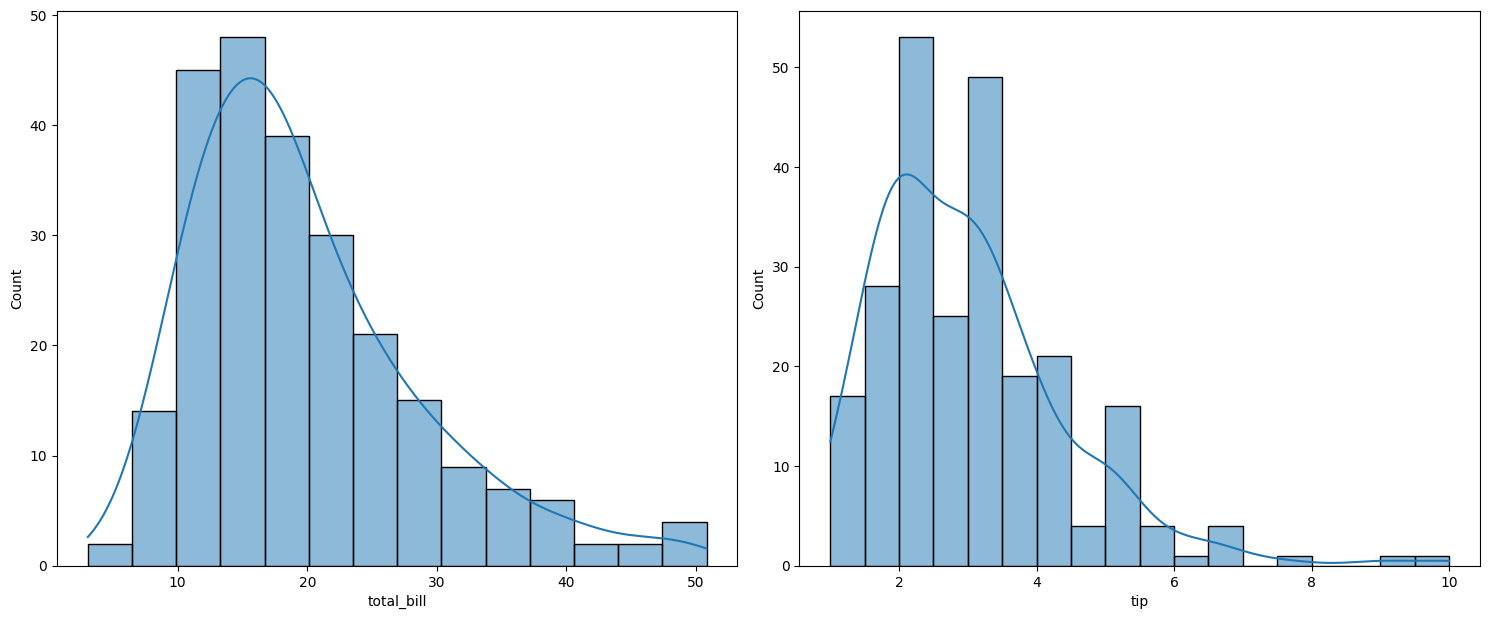

In [12]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(['total_bill', 'tip']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True) 
    plt.xlabel(col)

plt.tight_layout()
plt.show()

From the above plots, we can conclude that the data distribution is a little bit positively skewed. This is observed generally because macimum people spend in a certain range but some do such heavy expenditure that the distribution becomes positively skewed.

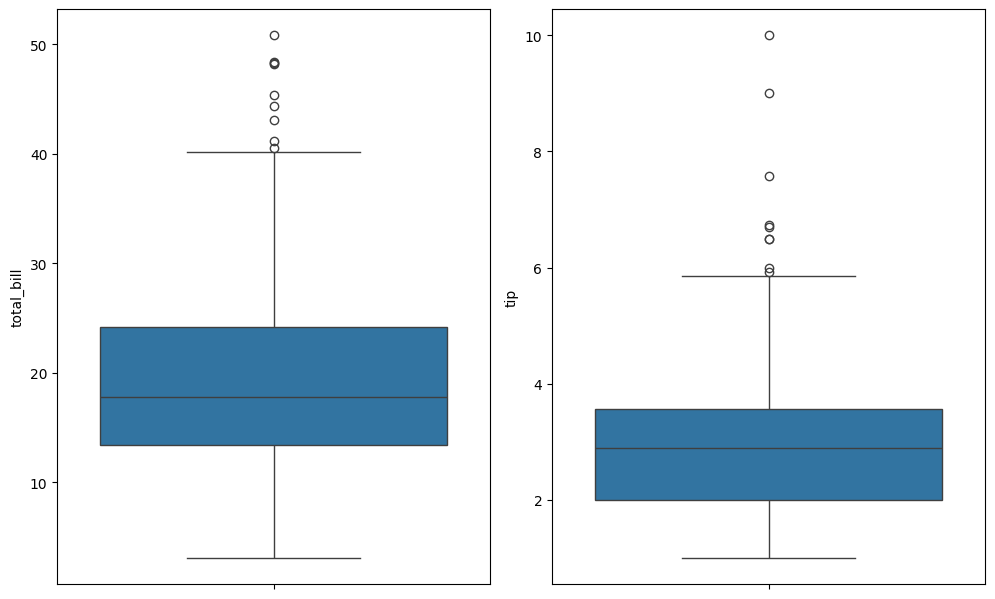

In [13]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(['total_bill', 'tip']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

From the above bocplots, we can say that there are outliers in the dataset. But we have very less amount of data already if we will drop more rows it would not be a good idea. But let's check how many rows we will have to remove in order to get rid of the outliers.

In [14]:
df.shape

(244, 7)

In [15]:
df[(df['total_bill']<45)&(df['tip']<7)].shape

(238, 7)

We will have to just lose 6 data points in order to get rid of most of the outliers so, let's do this.

In [16]:
df=df[(df['total_bill']<45)&(df['tip']<7)]

Let's draw the count plot for the categorical columns.

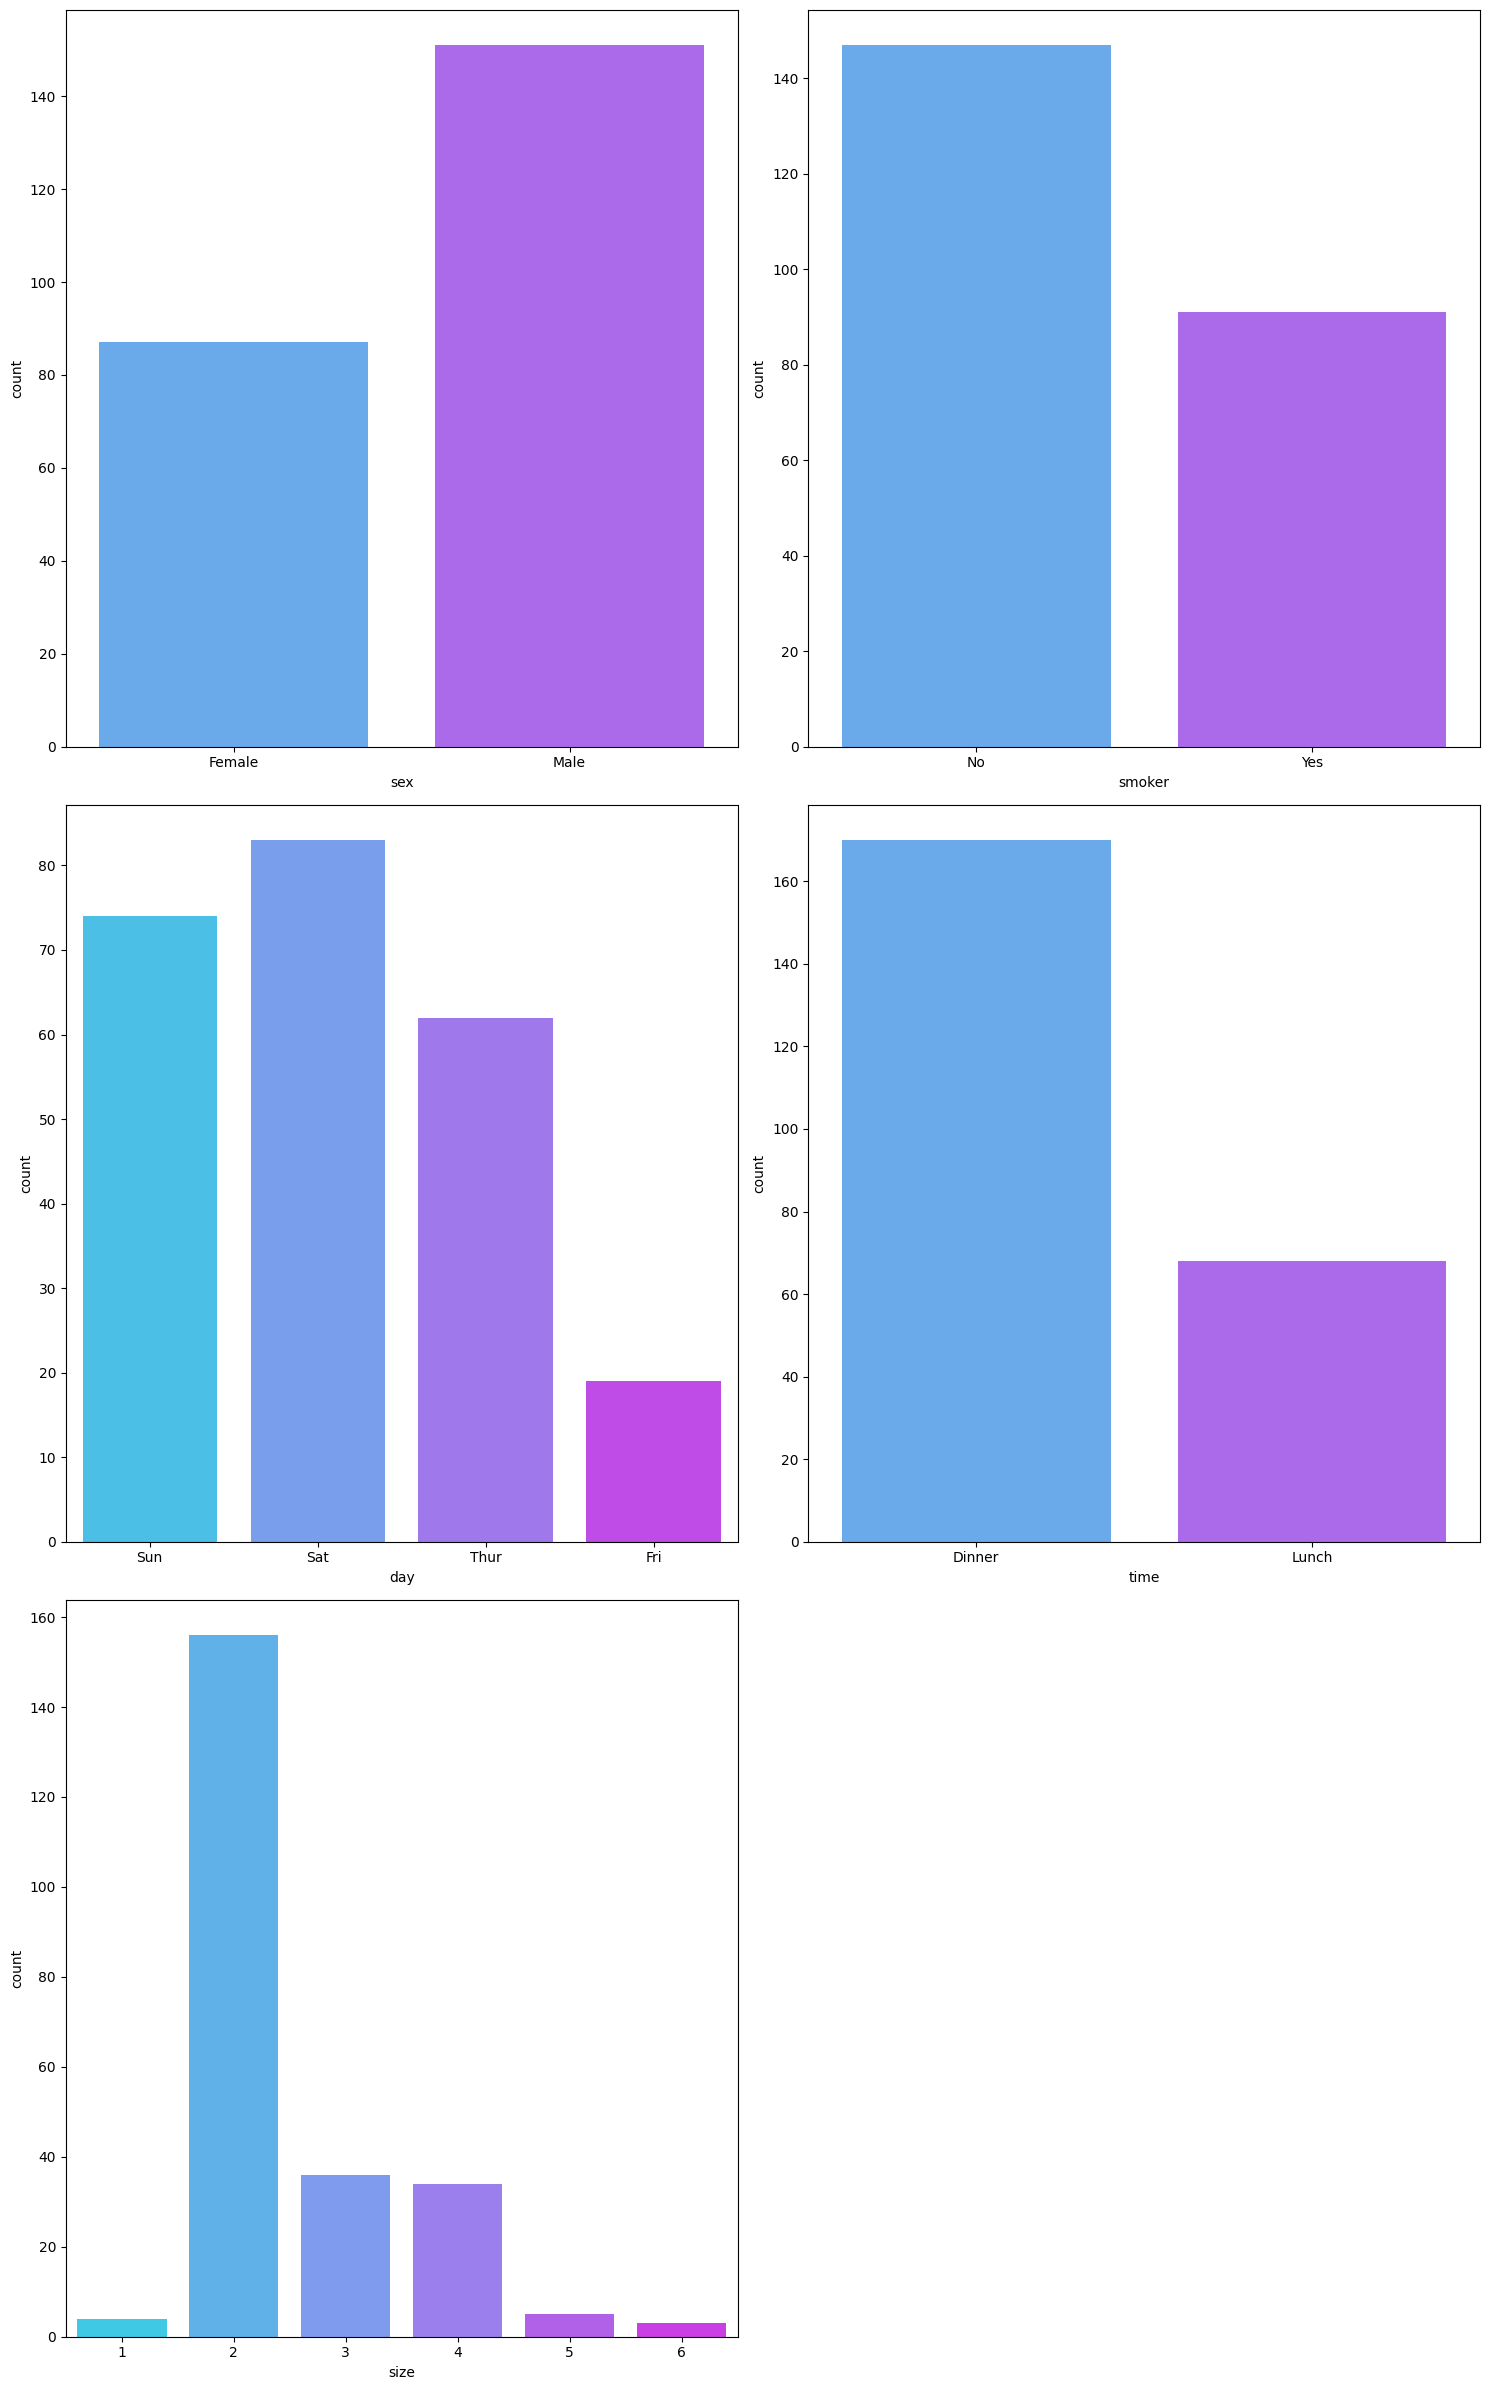

In [24]:
feat=df.loc[:, 'sex':'size'].columns

plt.figure(figsize=(15, 24))
for i, col in enumerate(feat):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, palette='cool')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Here we can draw some observations which are stated below:<br><br>
- Footfall on weekends is more than that on weekdays.
- People usually prefer dinner outside as compared to lunch.
- People going alone to restaurants is as rare as people going with a family of 5 or 6 persons.

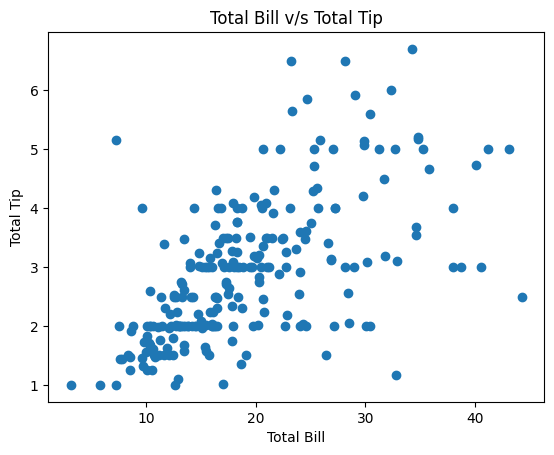

In [25]:
plt.scatter(df['total_bill'], df['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()

Let's see what is the relation between the size of the family and the tip given.

In [31]:
df.groupby(['size'])[['total_bill', 'tip']].mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,21.899722,3.206667
4,27.137647,3.814706
5,30.068000,4.028000
6,30.383333,5.300000


Here is an observation that we can derive from the above-grouped table that the tip given to the waiter is directly proportional to the number of people who have arrived to dine in.

In [32]:
df.groupby(['time'])[['total_bill', 'tip', 'size']].mean()

,total_bill,tip,size
time,,,
Dinner,19.882059,2.966235,2.582353
Lunch,17.168676,2.728088,2.411765


People who come at dinner time tend to pay more tips as compared to those whi came for lunch.

In [33]:
df.groupby(['day'])[['total_bill', 'tip', 'size']].mean()

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,19.175542,2.736024,2.457831
Sun,20.724865,3.228243,2.797297
Thur,17.682742,2.771452,2.451613


Here we can derive one observation that the tip given on weekends is generally higher than that compared that given on weekdays.

In [34]:
le=LabelEncoder()

for col in df.columns:
    if df[col].dtype==object:
        df[col]=le.fit_transform(df[col])

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


Now all the columns have been converted to numerical form. Let's drawa heatmap to analyze the correlation between the variables of the dataset.

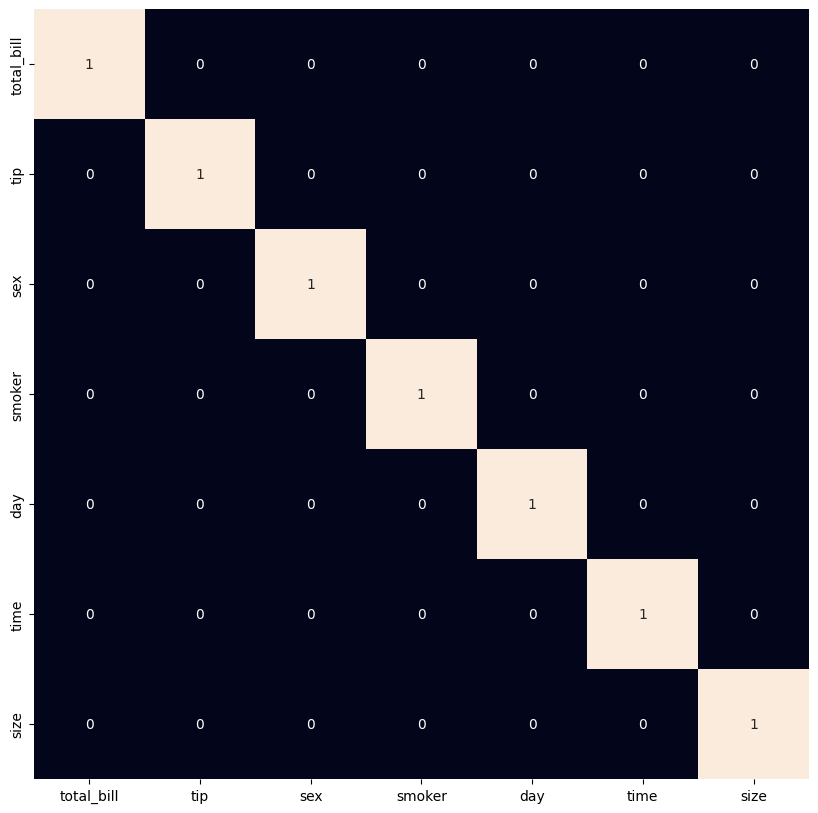

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()>0.7, annot=True, cbar=False)
plt.show()

From the above heatmap, it is certain that there are no highly correlated features in it.

## Model Development
There are so many state-of-the-art ML models available but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

In [36]:
features=df.drop('tip', axis=1)
target=df['tip']

X_train, X_val, y_train, y_val=train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((190, 6), (48, 6))

After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.

In [37]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

Now let's train some state-of-the-art ML models on the training data and then use the validation data for choosing the best out of them for prediction.

In [39]:
models=[LinearRegression(),
        XGBRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor()]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    
    print(f"{models[i]}:")
    pred_train=models[i].predict(X_train)
    print(f"Training Error: {np.round(mae(y_train, pred_train), 3)}")
    
    pred_val=models[i].predict(X_val)
    print(f"Validation Error: {np.round(mae(y_val, pred_val), 3)}\n")

LinearRegression():
Training Error: 0.714
Validation Error: 0.691

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):
Training Error: 0.019
Validation Error: 0.752

RandomForestRegressor():
Training Error: 0.291
Validation Error: 0.717

AdaBoostRegressor():
Training Error: 0.658
Validation Error: 0.694

Out of all the models XGBREgressor is giving the least value for the mean absolute error this means predictions made by this model are close to the real values as compared to the other model.

## Conclusion
The conclusions drawn from the small dataset used here closely resemble real-life scenarios. With a larger dataset, we could uncover even deeper patterns in the relationship between independent features and tips given to waiters.<br><br>
Don't miss out on the opportunity to capitalize on the data revolution! Industries across the board are achieving unprecedented success by harnessing the power of data. Enhance your skills and join one of the most significant trends of the 21st century.
